<a href="https://colab.research.google.com/github/SurajitBiswasPhysics/surajit-biswas.github.io/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [10]:
import os

# List the files in the test directory
test_files = os.listdir(test_dir)
print(test_files)


['10.jpg', '42.jpg', '4.jpg', '27.jpg', '8.jpg', '7.jpg', '6.jpg', '29.jpg', '20.jpg', '15.jpg', '41.jpg', '14.jpg', '23.jpg', '43.jpg', '26.jpg', '49.jpg', '11.jpg', '3.jpg', '18.jpg', '32.jpg', '1.jpg', '22.jpg', '19.jpg', '48.jpg', '28.jpg', '9.jpg', '45.jpg', '30.jpg', '16.jpg', '36.jpg', '34.jpg', '5.jpg', '47.jpg', '44.jpg', '17.jpg', '31.jpg', '46.jpg', '37.jpg', '12.jpg', '40.jpg', '50.jpg', '33.jpg', '38.jpg', '13.jpg', '24.jpg', '25.jpg', '2.jpg', '21.jpg', '35.jpg', '39.jpg']


In [9]:
!find . -name ".DS_Store"



In [8]:
import os

# Walk through directories and remove any .DS_Store files
for root, dirs, files in os.walk("."):
    for file in files:
        if file == ".DS_Store":
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Removed: {file_path}")


Removed: ./cats_and_dogs/.DS_Store
Removed: ./cats_and_dogs/test/.DS_Store
Removed: ./cats_and_dogs/validation/.DS_Store
Removed: ./cats_and_dogs/train/.DS_Store


In [14]:
import os
import shutil

# Create a subdirectory inside the test directory
all_dir = os.path.join(test_dir, 'all')
os.makedirs(all_dir, exist_ok=True)


In [15]:
# Move all files into the "all" folder
for filename in os.listdir(test_dir):
    file_path = os.path.join(test_dir, filename)
    if os.path.isfile(file_path):  # Ensure it’s a file
        shutil.move(file_path, all_dir)

# Check the structure
print("Files moved successfully!")
print(os.listdir(all_dir))  # List files in the "all" folder


Files moved successfully!
['10.jpg', '42.jpg', '4.jpg', '27.jpg', '8.jpg', '7.jpg', '6.jpg', '29.jpg', '20.jpg', '15.jpg', '41.jpg', '14.jpg', '23.jpg', '43.jpg', '26.jpg', '49.jpg', '11.jpg', '3.jpg', '18.jpg', '32.jpg', '1.jpg', '22.jpg', '19.jpg', '48.jpg', '28.jpg', '9.jpg', '45.jpg', '30.jpg', '16.jpg', '36.jpg', '34.jpg', '5.jpg', '47.jpg', '44.jpg', '17.jpg', '31.jpg', '46.jpg', '37.jpg', '12.jpg', '40.jpg', '50.jpg', '33.jpg', '38.jpg', '13.jpg', '24.jpg', '25.jpg', '2.jpg', '21.jpg', '35.jpg', '39.jpg']


In [17]:
# 3
train_image_generator = ImageDataGenerator(rescale=1.0/255)
validation_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,  # Path to the training dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'  # Adjust if using categorical classes
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,  # Path to the validation dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,  # Path to the test dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,  # No labels for test data
    shuffle=False  # Ensures predictions match test image order
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


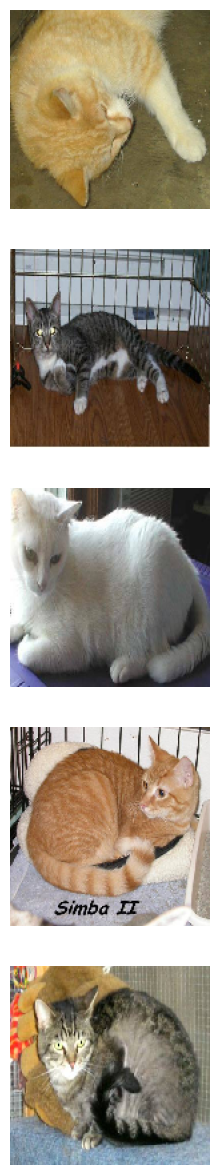

In [18]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [19]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images between 0 and 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear images by a factor of 0.2
    zoom_range=0.2,  # Zoom in or out by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill pixels that are lost due to transformation
)


Found 2000 images belonging to 2 classes.


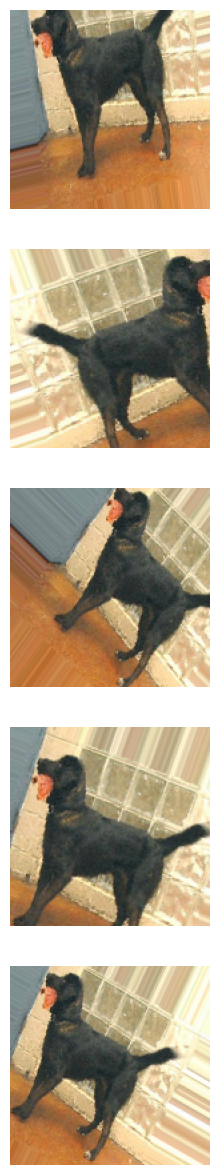

In [20]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [24]:
# 7
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    # First convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size

    # Second convolutional layer with 64 filters, kernel size 3x3, and ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size

    # Third convolutional layer with 128 filters, kernel size 3x3, and ReLU activation
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size

    # Flatten the output from 3D to 1D
    Flatten(),

    # Fully connected layer with ReLU activation
    Dense(512, activation='relu'),

    # Output layer with a sigmoid activation function for binary classification
    # For multi-class classification, you would use 'softmax' and adjust the number of units to match the number of classes
    Dense(1, activation='sigmoid')  # Use 'softmax' and adjust units for multi-class problems
])

# Compile the model with Adam optimizer and binary crossentropy loss for binary classification
model.compile(
    optimizer=Adam(),  # Adam optimizer is commonly used for CNNs
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class problems
    metrics=['accuracy']  # Track accuracy during training
)



model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# 8
history = model.fit(
    train_data_gen,  # The training data generator
    steps_per_epoch=train_data_gen.samples // batch_size,  # Number of steps per epoch (number of batches)
    epochs=10,  # Number of training epochs
    validation_data=val_data_gen,  # Validation data generator
    validation_steps=val_data_gen.samples // batch_size  # Number of validation steps
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.4969 - loss: 0.9765 - val_accuracy: 0.6295 - val_loss: 0.6904
Epoch 2/10
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.5781 - loss: 0.6924

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.5781 - loss: 0.6924 - val_accuracy: 0.6154 - val_loss: 0.6868
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 132s 7s/step - accuracy: 0.5101 - loss: 0.6906 - val_accuracy: 0.5257 - val_loss: 0.6679
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5391 - loss: 0.6800 - val_accuracy: 0.4904 - val_loss: 0.6910
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.5770 - loss: 0.6720 - val_accuracy: 0.6306 - val_loss: 0.6446
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.5234 - loss: 0.6613 - val_accuracy: 0.6635 - val_loss: 0.6325
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.5969 - loss: 0.6531 - val_accuracy: 0.6083 - val_loss: 0.6364
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.5703 - loss: 0.6778 - val_accuracy: 0.6538 - val_loss: 0.6130
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.6233 - loss: 0.6391 - val_accuracy: 0.6328 - val_loss: 0.

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")